<a href="https://colab.research.google.com/github/JuanLagosP/challenge1-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [47]:
tiendas = [tienda, tienda2, tienda3, tienda4]

facturacion = {f'tienda {i + 1}': sum(t['Precio']) for i, t in enumerate(tiendas)}
facturacion

{'tienda 1': 1150880400.0,
 'tienda 2': 1116343500.0,
 'tienda 3': 1098019600.0,
 'tienda 4': 1038375700.0}

# 2. Ventas por categoría

In [52]:
ventas_por_categoria = {}

for t in tiendas:
  for i, col in t.iterrows():
    categoria = col['Categoría del Producto']
    precio = col['Precio']

    if categoria in ventas_por_categoria:
      ventas_por_categoria[categoria] += precio
    else:
      ventas_por_categoria[categoria] = precio

ventas_por_categoria

{'Electrónicos': 1660576500.0,
 'Muebles': 757661000.0,
 'Juguetes': 73604400.0,
 'Electrodomésticos': 1324751100.0,
 'Artículos para el hogar': 57579800.0,
 'Deportes y diversión': 142977700.0,
 'Libros': 37696100.0,
 'Instrumentos musicales': 348772600.0}

# 3. Calificación promedio de la tienda


In [45]:
from statistics import mean

calificacion_promedio = {f'tienda {i + 1}': round(mean(t['Calificación']), 2) for i, t in enumerate(tiendas)}
calificacion_promedio

{'tienda 1': 4.0, 'tienda 2': 4.04, 'tienda 3': 4.05, 'tienda 4': 4.0}

# 4. Productos más y menos vendidos

In [56]:
ventas_por_producto = {}

for t in tiendas:
  for producto in t['Producto']:

    if producto in ventas_por_producto:
      ventas_por_producto[producto] += 1
    else:
      ventas_por_producto[producto] = 1

ventas_por_producto = dict(sorted(ventas_por_producto.items(), key=lambda x: x[1], reverse=True))
ventas_por_producto

{'Mesa de noche': 210,
 'Microondas': 206,
 'Carrito de control remoto': 206,
 'Batería': 203,
 'Cama king': 201,
 'Set de ollas': 200,
 'Secadora de ropa': 200,
 'Modelado predictivo': 200,
 'Bloques de construcción': 199,
 'Cama box': 199,
 'Iphone 15': 198,
 'Armario': 197,
 'Balón de baloncesto': 197,
 'Pandereta': 197,
 'Bicicleta': 196,
 'Iniciando en programación': 195,
 'Smart TV': 192,
 'Refrigerador': 191,
 'Lavavajillas': 189,
 'Cubertería': 189,
 'Kit de bancas': 188,
 'Impresora': 188,
 'Guitarra acústica': 188,
 'TV LED UHD 4K': 187,
 'Vaso térmico': 187,
 'Estufa': 187,
 'Cuerda para saltar': 186,
 'Mesa de comedor': 185,
 'Balón de voleibol': 184,
 'Sofá reclinable': 182,
 'Silla de oficina': 181,
 'Dashboards con Power BI': 181,
 'Ajedrez de madera': 180,
 'Cubo mágico 8x8': 180,
 'Tablet ABXY': 179,
 'Lavadora de ropa': 176,
 'Juego de mesa': 175,
 'Muñeca bebé': 175,
 'Dinosaurio Rex': 175,
 'Mesa de centro': 175,
 'Auriculares': 174,
 'Olla de presión': 172,
 'Smart

# 5. Envío promedio por tienda

In [59]:
envio_promedio = {f'tienda {i + 1}': round(mean(t['Costo de envío']), 2) for i, t in enumerate(tiendas)}
envio_promedio

{'tienda 1': 26018.61,
 'tienda 2': 25216.24,
 'tienda 3': 24805.68,
 'tienda 4': 23459.46}

# 6. Visualización de Resultados


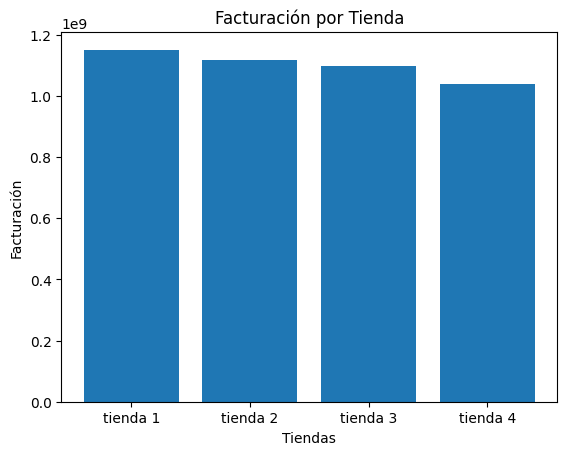

In [60]:
import matplotlib.pyplot as plt

# Facturación por tienda

plt.bar(facturacion.keys(), facturacion.values())
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.title('Facturación por Tienda')
plt.show()

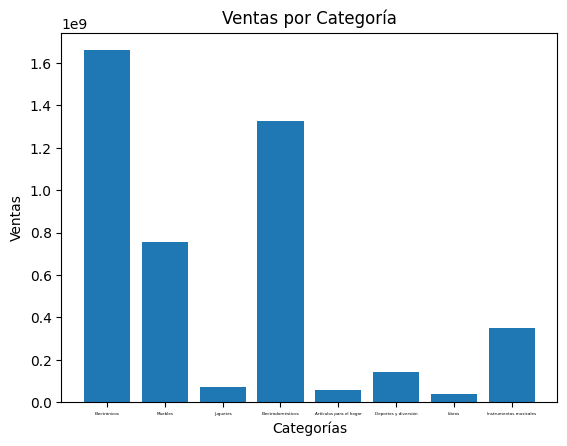

In [67]:
# Ventas por categoría

plt.bar(ventas_por_categoria.keys(), ventas_por_categoria.values())
plt.xlabel('Categorías')
plt.tick_params(axis='x', labelsize=3)
plt.ylabel('Ventas')
plt.title('Ventas por Categoría')
plt.show()

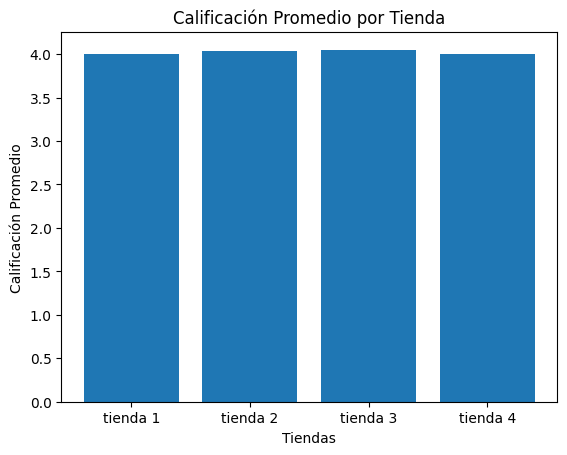

In [68]:
# Calificación promedio

plt.bar(calificacion_promedio.keys(), calificacion_promedio.values())
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.show()

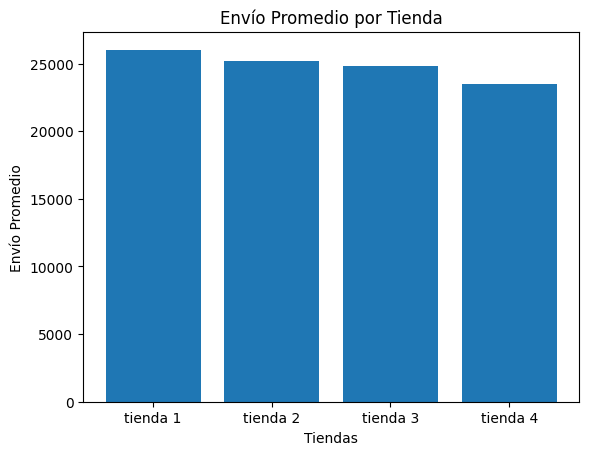

In [70]:
# Envío promedio

plt.bar(envio_promedio.keys(), envio_promedio.values())
plt.xlabel('Tiendas')
plt.ylabel('Envío Promedio')
plt.title('Envío Promedio por Tienda')
plt.show()